In [1]:
import pandas as pd

# Read trips and resample to a weekly count

In [2]:
timeseries = pd.read_parquet("../data/interim/comb_trips.gzip").set_index("started_at")

timeseries.index.name = "date"
# ended at was randomly selected of the columns, could be any of them
weekly = timeseries.resample("1W").count().ended_at

In [3]:
timeseries

,ended_at,start_station_id,end_station_id,member_casual
date,,,,
2010-09-20 11:27:04,2010-09-20 11:43:56,31208,31108,member
2010-09-20 11:41:22,2010-09-20 11:42:23,31209,31209,member
2010-09-20 12:05:37,2010-09-20 12:50:27,31600,31100,member
2010-09-20 12:06:05,2010-09-20 12:29:32,31600,31602,member
2010-09-20 12:10:43,2010-09-20 12:34:17,31100,31201,member
...,...,...,...,...
2022-03-12 17:02:00,2022-03-12 17:11:09,31641,31629,member
2022-03-19 15:28:33,2022-03-19 16:04:03,31641,31290,casual
2022-03-29 13:08:30,2022-03-29 13:18:09,31660,31637,member


# checking the toal number of trips by category

In [4]:
timeseries.groupby("member_casual").count()

,ended_at,start_station_id,end_station_id
member_casual,,,
casual,7493621,7336418,7303970
member,24050044,23903353,23896266
unknown,58,58,58


## Splitting between member trips and casual (i.e. non-member)

In [5]:
membertrips_week = (
    timeseries[timeseries.member_casual == "member"].resample("1W").count().ended_at
)
casualtrips_week = (
    timeseries[timeseries.member_casual == "casual"].resample("1W").count().ended_at
)
# give them a name for the legened in the plot
membertrips_week.name = "member trips"
casualtrips_week.name = "non-member trips"

## Plotting the member and non-member trips

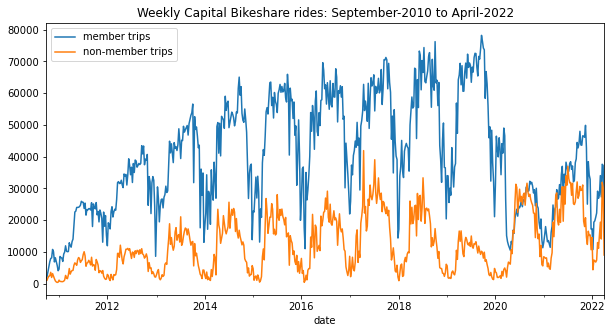

In [6]:
# finding the range of dates being mapped
start = weekly.index.min()
end = weekly.index.max()

ax = combined_timseries = pd.merge_asof(
    membertrips_week, casualtrips_week, left_index=True, right_index=True
).plot(
    figsize=(10, 5),
    title=f"Weekly Capital Bikeshare rides: {start.month_name()}-{start.year} to {end.month_name()}-{end.year}",
)
fig = ax.get_figure()
fig.savefig(
    "../reports/figures/weekly_trips.png", bbox_inches="tight", facecolor="w", dpi=200
)

<AxesSubplot:xlabel='day'>

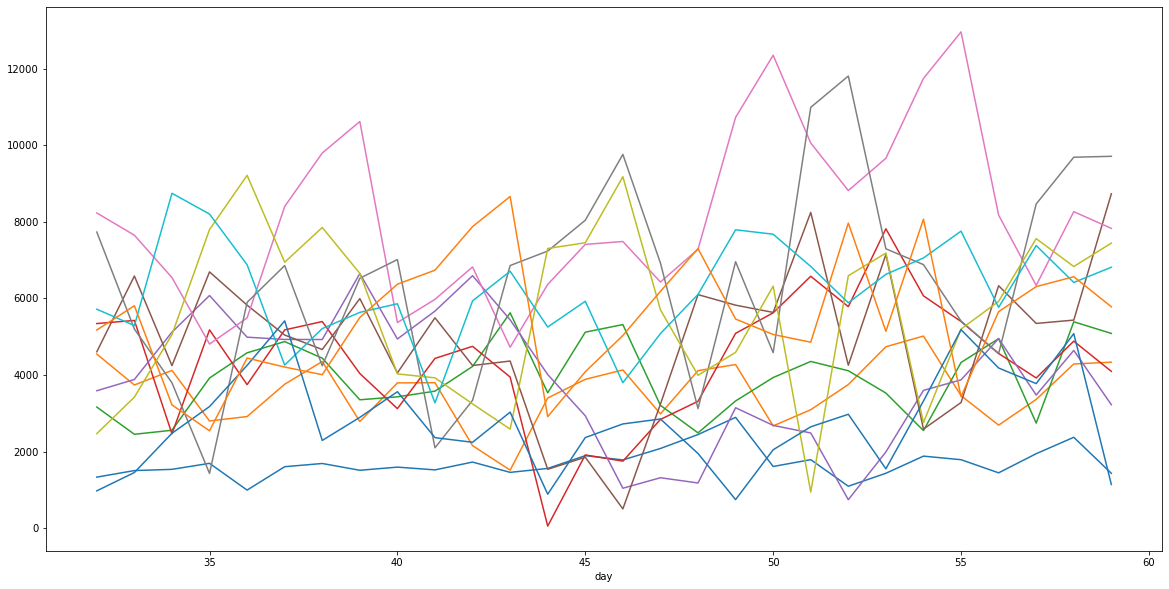

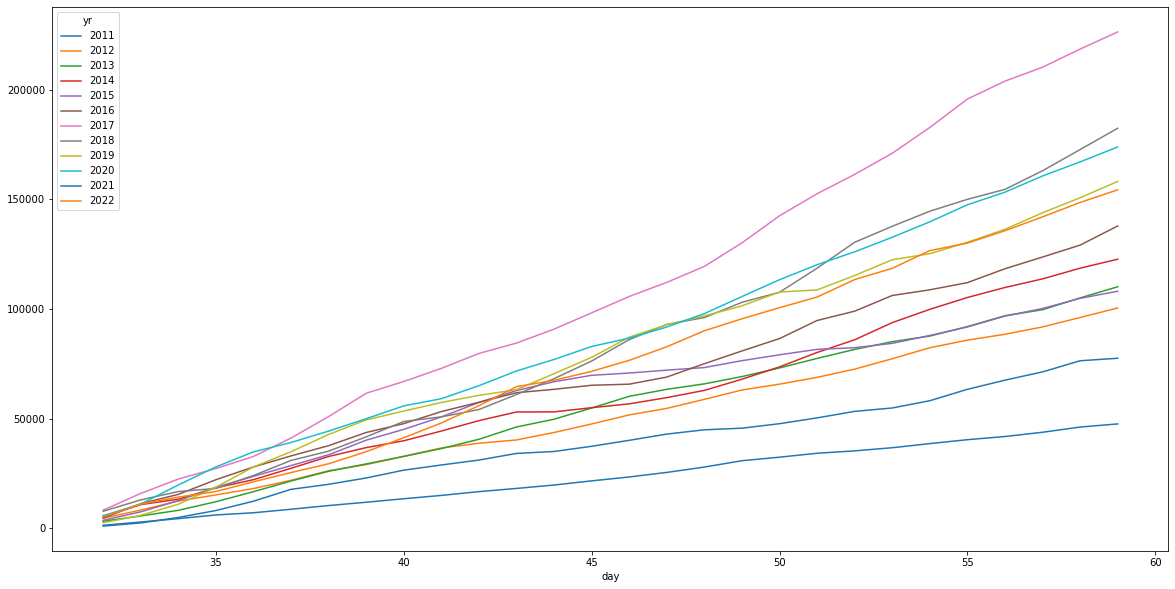

In [7]:
febtrips = (
    timeseries[timeseries.index.month == 2].resample("1D").count().ended_at.to_frame()
)
febtrips.assign(yr=febtrips.index.year, day=febtrips.index.dayofyear).pivot(
    index="day", columns="yr", values="ended_at"
).dropna().plot(legend=False, figsize=(20, 10))
febtrips.assign(yr=febtrips.index.year, day=febtrips.index.dayofyear).pivot(
    index="day", columns="yr", values="ended_at"
).dropna().cumsum().plot(figsize=(20, 10))

<AxesSubplot:xlabel='date'>

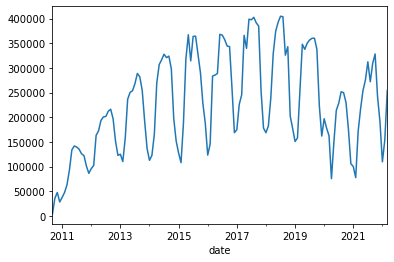

In [8]:
timeseries.resample("1M").count().ended_at.plot()